In [27]:
import pandas as pd
import matplotlib.pyplot as plt 

header_list = ["station", "measure", "Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
df = pd.read_csv ('data/allStations_testError.csv',names=header_list)
dfTh = pd.read_csv ('data/th_Stations_testErrorTH.csv',names=header_list)

In [17]:
df_mean=df[df.measure=='meanE'].reindex()
df_mean.drop('measure', inplace=True, axis=1)
dfTh_mean=dfTh[dfTh.measure=='meanE'].reindex()
dfTh_mean.drop('measure', inplace=True, axis=1)

In [18]:
dfTh_mean

,station,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,Mollet,10.719375,9.291064,8.221195,7.884571,14.552459,12.600109,13.681189
2,QuatreCamins,5.066463,4.660708,5.336545,8.060160,14.964702,9.149935,9.604300
4,SantBoi,4.879641,4.359281,5.684417,4.837326,7.963764,5.471996,8.597928


In [19]:
df_meanT=df_mean.T
df_meanT.rename(columns=df_meanT.iloc[0], inplace = True)
df_meanT.drop(df_meanT.index[0], inplace = True)
df_meanT

,Cerdanyola,Granollers,Mollet,PratDelLlobregat,QuatreCamins,SantBoi,SantSadurni,Vilanova
Monday,6.34684,6.14644,10.9293,18.839,4.82804,4.82625,4.45371,4.97622
Tuesday,7.26413,7.13659,9.40571,15.0634,4.46009,4.37647,5.55834,3.04307
Wednesday,12.3763,4.22456,8.11035,14.0813,5.1912,5.67969,6.57358,2.31606
Thursday,21.6428,4.17712,7.78978,17.9777,7.98303,4.91693,12.1056,2.69104
Friday,16.244,7.56734,14.0621,16.8817,14.8004,8.00721,13.2092,4.35613
Saturday,12.7917,1.52628,12.5019,16.1246,9.43057,5.88951,8.84928,2.9329
Sunday,16.6852,2.84196,13.7083,11.3073,9.85381,9.76107,6.70362,4.68381


<Figure size 432x288 with 0 Axes>

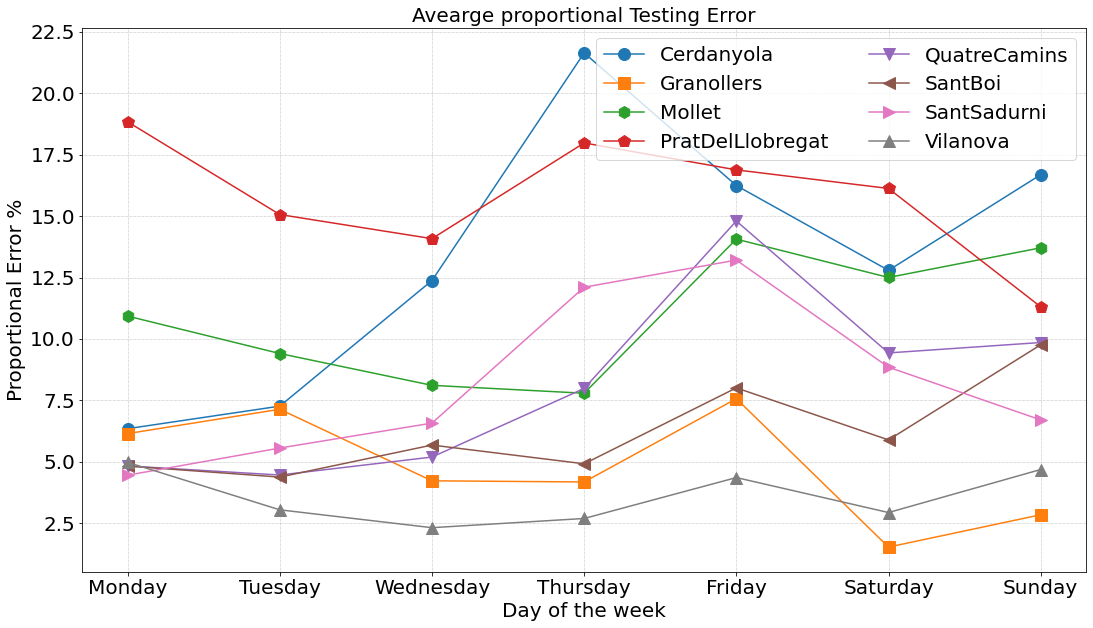

In [56]:
fsize=20
markers=['o','s','h','p','v','<','>','^']
plt.figure();
ax = df_meanT.plot(figsize=(18,10), marker='.', markersize=12);
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])
plt.title("Avearge proportional Testing Error", fontsize=fsize)    
plt.ylabel("Proportional Error %",fontsize=fsize);
plt.xlabel("Day of the week",fontsize=fsize);
plt.yticks(fontsize=fsize);
plt.xticks(fontsize=fsize);
plt.grid(linestyle='dotted', linewidth='0.5', color='grey')
plt.legend(fontsize=fsize, loc="best",ncol=2);
plt.savefig('AggTestError.pdf',bbox_inches='tight');

In [21]:
dfTh_meanT=dfTh_mean.T
dfTh_meanT.rename(columns=dfTh_meanT.iloc[0], inplace = True)
dfTh_meanT.drop(dfTh_meanT.index[0], inplace = True)
dfTh_meanT

,Mollet,QuatreCamins,SantBoi
Monday,10.7194,5.06646,4.87964
Tuesday,9.29106,4.66071,4.35928
Wednesday,8.22119,5.33655,5.68442
Thursday,7.88457,8.06016,4.83733
Friday,14.5525,14.9647,7.96376
Saturday,12.6001,9.14994,5.472
Sunday,13.6812,9.6043,8.59793


<AxesSubplot:>

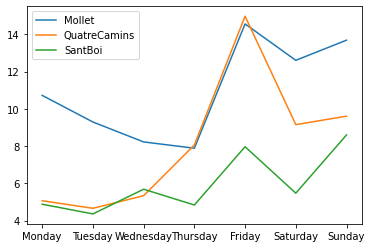

In [22]:
dfTh_meanT.plot()

<AxesSubplot:>

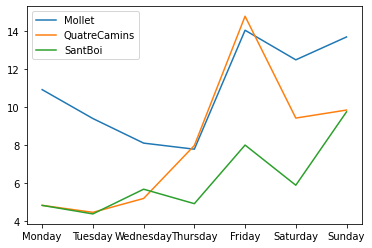

In [23]:
df_meanT[['Mollet','QuatreCamins','SantBoi']].plot()